In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import datasets

%matplotlib inline

plt.rcParams["figure.figsize"] = (6, 6)


Kích thước X: (300, 2)


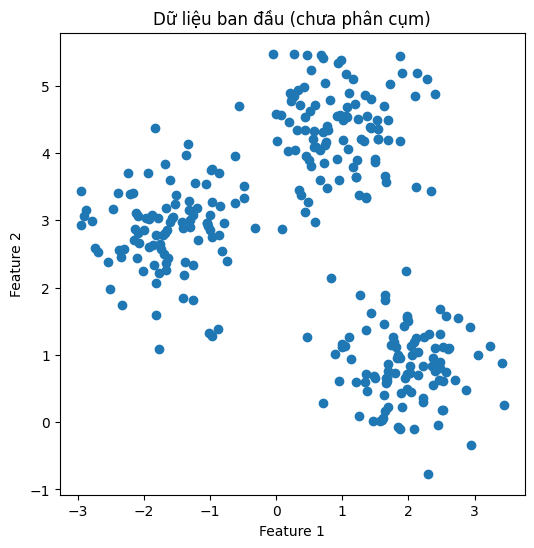

Tâm cụm (cluster centers):
 [[-1.60811992  2.85881658]
 [ 1.95159369  0.83467497]
 [ 0.95625704  4.37226546]]


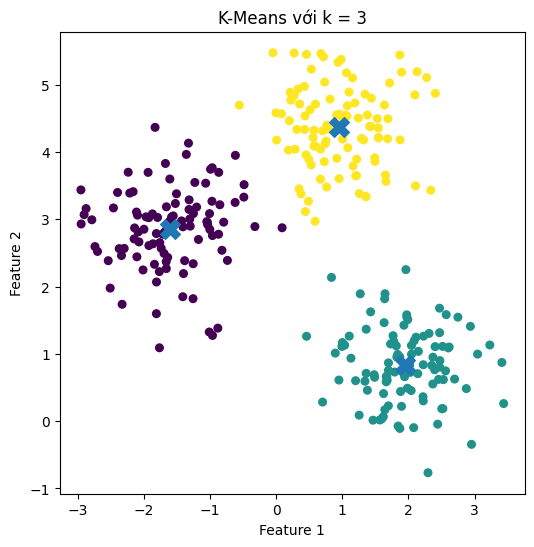

In [8]:
# Tạo dữ liệu 2D với 3 cụm
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.60,
    random_state=0
)

print("Kích thước X:", X.shape)

# Vẽ dữ liệu ban đầu
plt.scatter(X[:, 0], X[:, 1])
plt.title("Dữ liệu ban đầu (chưa phân cụm)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Áp dụng KMeans với k = 3
kmeans = KMeans(
    n_clusters=3,
    n_init=10,
    random_state=0
)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

print("Tâm cụm (cluster centers):\n", centers)

# Vẽ dữ liệu đã gán cụm
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X')
plt.title("K-Means với k = 3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

k = 2, inertia = 655.34, silhouette = 0.553
k = 3, inertia = 212.36, silhouette = 0.660
k = 4, inertia = 182.82, silhouette = 0.541
k = 5, inertia = 158.51, silhouette = 0.456
k = 6, inertia = 137.87, silhouette = 0.314
k = 7, inertia = 119.60, silhouette = 0.328
k = 8, inertia = 103.46, silhouette = 0.339
k = 9, inertia = 89.07, silhouette = 0.350


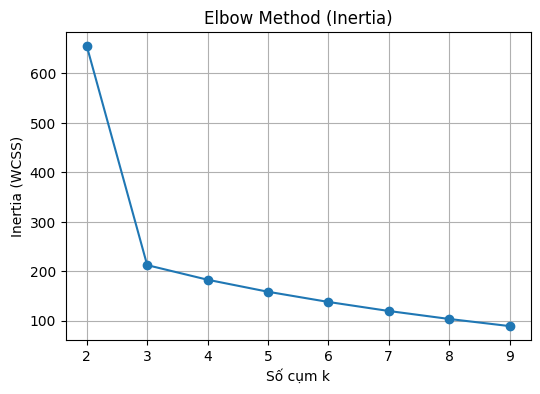

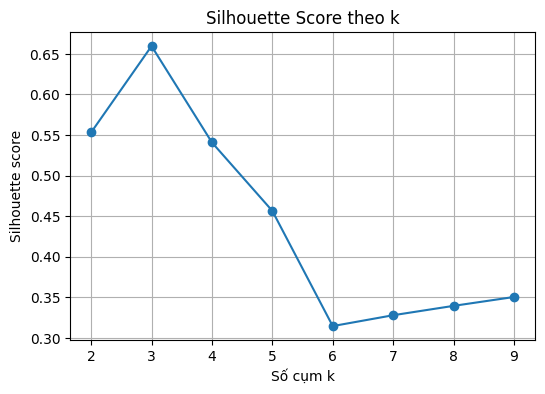

In [9]:
inertias = []
sil_scores = []

K_range = range(2, 10)  # silhouette không định nghĩa cho k=1

for k in K_range:
    model = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=0
    )
    labels = model.fit_predict(X)
    inertias.append(model.inertia_)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"k = {k}, inertia = {model.inertia_:.2f}, silhouette = {sil:.3f}")

# Vẽ Elbow (Inertia)
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.title("Elbow Method (Inertia)")
plt.xlabel("Số cụm k")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

# Vẽ Silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores, marker='o')
plt.xticks(K_range)
plt.title("Silhouette Score theo k")
plt.xlabel("Số cụm k")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

Iteration 1


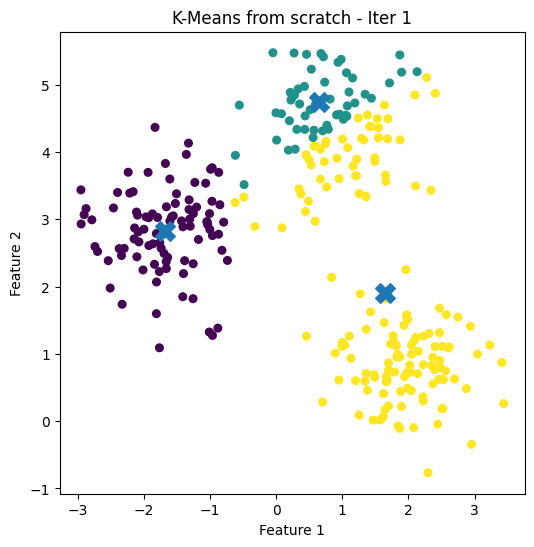

Iteration 2


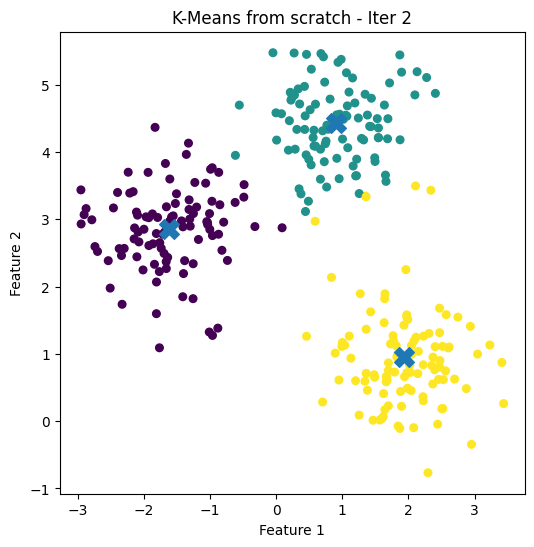

Iteration 3


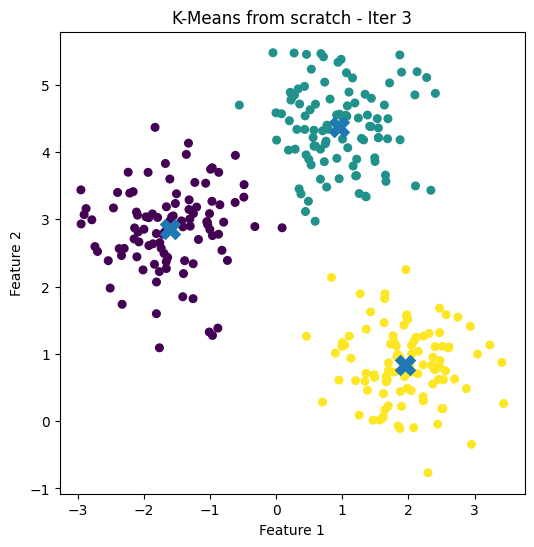

Iteration 4


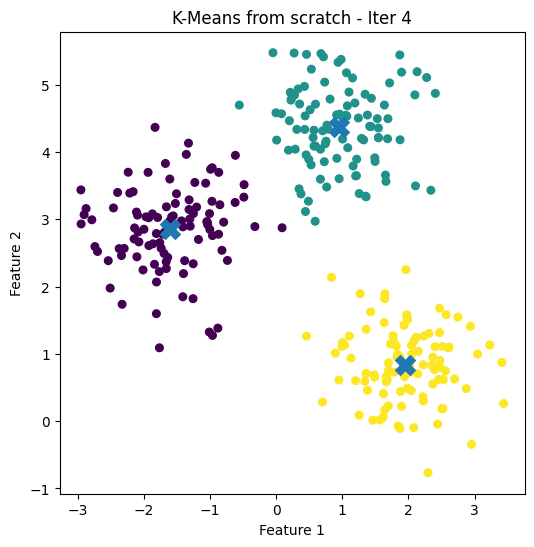

Hội tụ sau 4 vòng lặp.


In [10]:

def init_centroids(X, k, random_state=None):
    rng = np.random.RandomState(random_state)
    indices = rng.choice(X.shape[0], size=k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    # Tính khoảng cách Euclid từ mọi điểm tới mọi tâm cụm
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)  # (n_samples, k)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            # Nếu cụm rỗng, giữ nguyên (hoặc khởi tạo lại ngẫu nhiên)
            new_centroids.append(np.zeros(X.shape[1]))
        else:
            new_centroids.append(cluster_points.mean(axis=0))
    return np.vstack(new_centroids)

def kmeans_from_scratch(X, k, max_iters=10, random_state=None, verbose=True):
    centroids = init_centroids(X, k, random_state=random_state)

    for it in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if verbose:
            print(f"Iteration {it+1}")
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
            plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=200, marker='X')
            plt.title(f"K-Means from scratch - Iter {it+1}")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()

        # Kiểm tra hội tụ (nếu tâm cụm không đổi)
        if np.allclose(centroids, new_centroids):
            print("Hội tụ sau", it+1, "vòng lặp.")
            break

        centroids = new_centroids

    return centroids, labels

# Demo from scratch với k = 3
centroids_scratch, labels_scratch = kmeans_from_scratch(
    X,
    k=3,
    max_iters=10,
    random_state=42,
    verbose=True
)

Kích thước dữ liệu Iris: (150, 4)


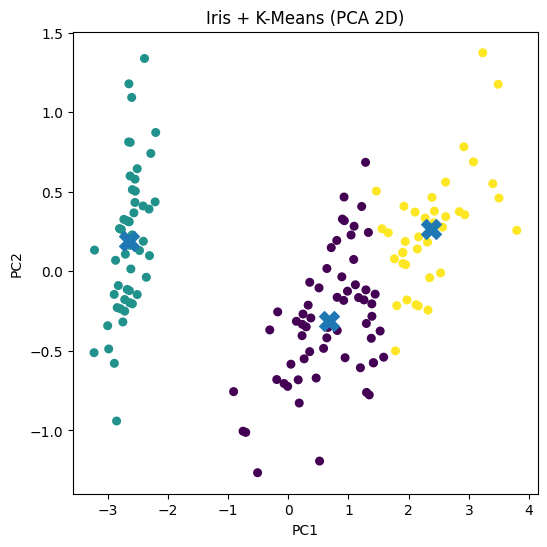

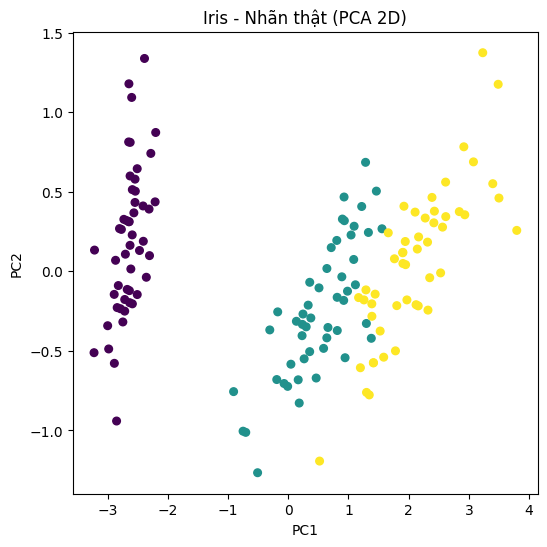

In [11]:
iris = datasets.load_iris()
X_iris = iris.data    # 4 chiều
y_iris = iris.target  # nhãn thật (0,1,2)

print("Kích thước dữ liệu Iris:", X_iris.shape)

# Áp dụng K-Means với k=3 (vì Iris có 3 lớp)
kmeans_iris = KMeans(
    n_clusters=3,
    n_init=10,
    random_state=0
)
labels_iris = kmeans_iris.fit_predict(X_iris)

# Giảm chiều xuống 2D bằng PCA để vẽ
pca = PCA(n_components=2, random_state=0)
X_iris_2d = pca.fit_transform(X_iris)

centers_2d = pca.transform(kmeans_iris.cluster_centers_)

plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=labels_iris, s=30)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=200, marker='X')
plt.title("Iris + K-Means (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# So sánh sơ bộ với nhãn thật
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, s=30)
plt.title("Iris - Nhãn thật (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

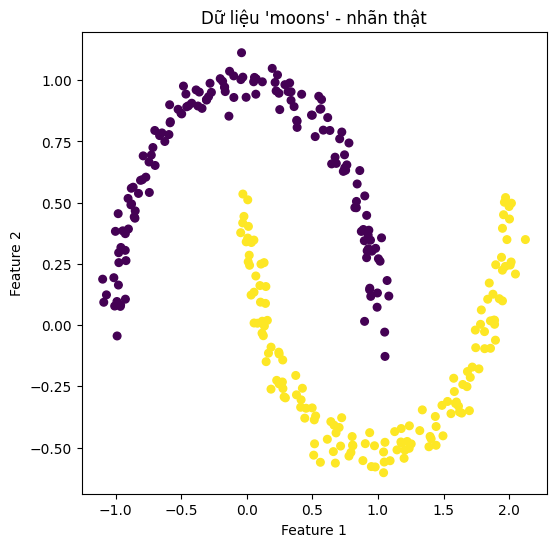

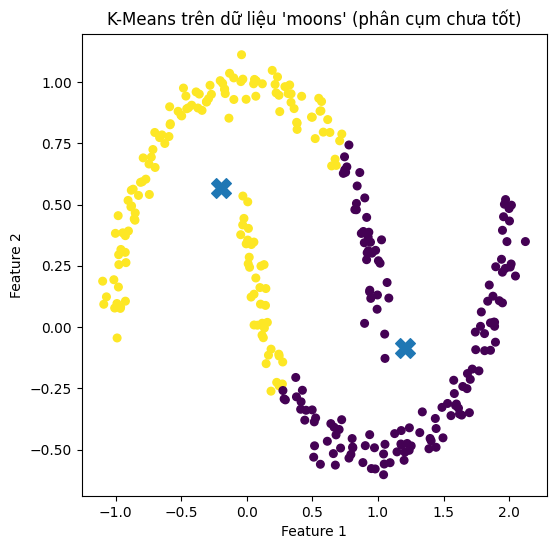

In [12]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=0)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=30)
plt.title("Dữ liệu 'moons' - nhãn thật")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Áp dụng K-Means với k = 2
kmeans_moons = KMeans(
    n_clusters=2,
    n_init=10,
    random_state=0
)
labels_moons = kmeans_moons.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=30)
plt.scatter(
    kmeans_moons.cluster_centers_[:, 0],
    kmeans_moons.cluster_centers_[:, 1],
    s=200,
    marker='X'
)
plt.title("K-Means trên dữ liệu 'moons' (phân cụm chưa tốt)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


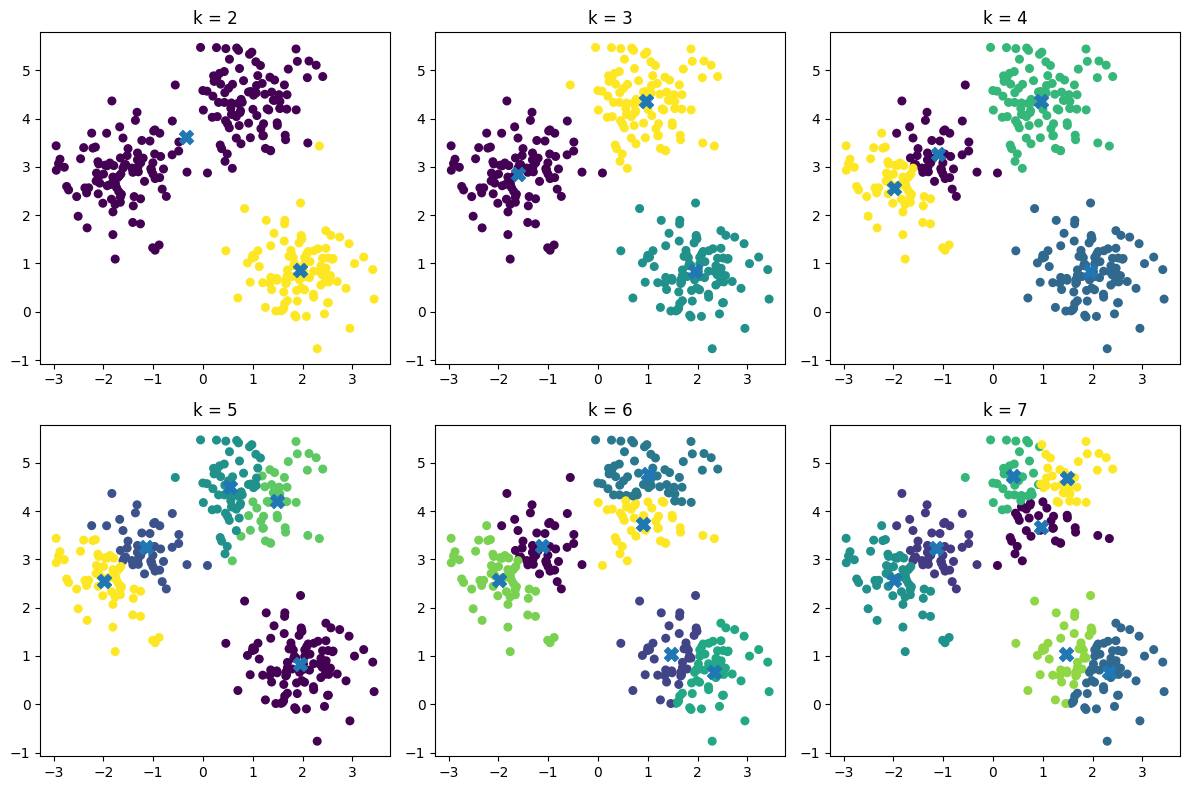

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for idx, k in enumerate([2, 3, 4, 5, 6, 7]):
    model = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=0
    )
    labels = model.fit_predict(X)
    axes[idx].scatter(X[:, 0], X[:, 1], c=labels, s=30)
    axes[idx].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, marker='X')
    axes[idx].set_title(f"k = {k}")

plt.tight_layout()
plt.show()